In [1]:
import matplotlib.pyplot as plt
import os
import sys
import inspect

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
os.chdir(parentdir)

from create_masks import load_3dmm
from config_file import config, SUNGLASSES_MASK_NAME, CORONA_MASK_NAME, CENTER_FACE_PART
from masks_indices import get_lens, get_mask_string, get_sunglasses_left_eye

In [2]:
# Get 3D model
verts, vertsr = load_3dmm()
x=vertsr[:,0];y=vertsr[:,1];z=vertsr[:,2];

In [3]:
right_eye_ind = config[SUNGLASSES_MASK_NAME].inds.right
left_eye_ind = get_sunglasses_left_eye(right_eye_ind, x, y)
right_lens_inds, right_ind_right_eye, left_ind_right_eye = get_lens(right_eye_ind, x, y)
left_lens_inds, right_ind_left_eye, left_ind_left_eye = get_lens(left_eye_ind, x, y)
left_string = get_mask_string(left_ind_left_eye,
                              config[CORONA_MASK_NAME].inds.left_upper_string2,
                              CENTER_FACE_PART, x, x, y)
center_string = get_mask_string(right_eye_ind, left_eye_ind, CENTER_FACE_PART, x, x, y)
right_string = get_mask_string(config[CORONA_MASK_NAME].inds.right_upper_string2,
                               right_ind_right_eye, CENTER_FACE_PART, x, x, y)

Blue dots- 3DMM face model.
Cyan dots - the sides of the sunglasses.
Green dots - center string.
Red dots - lenses.



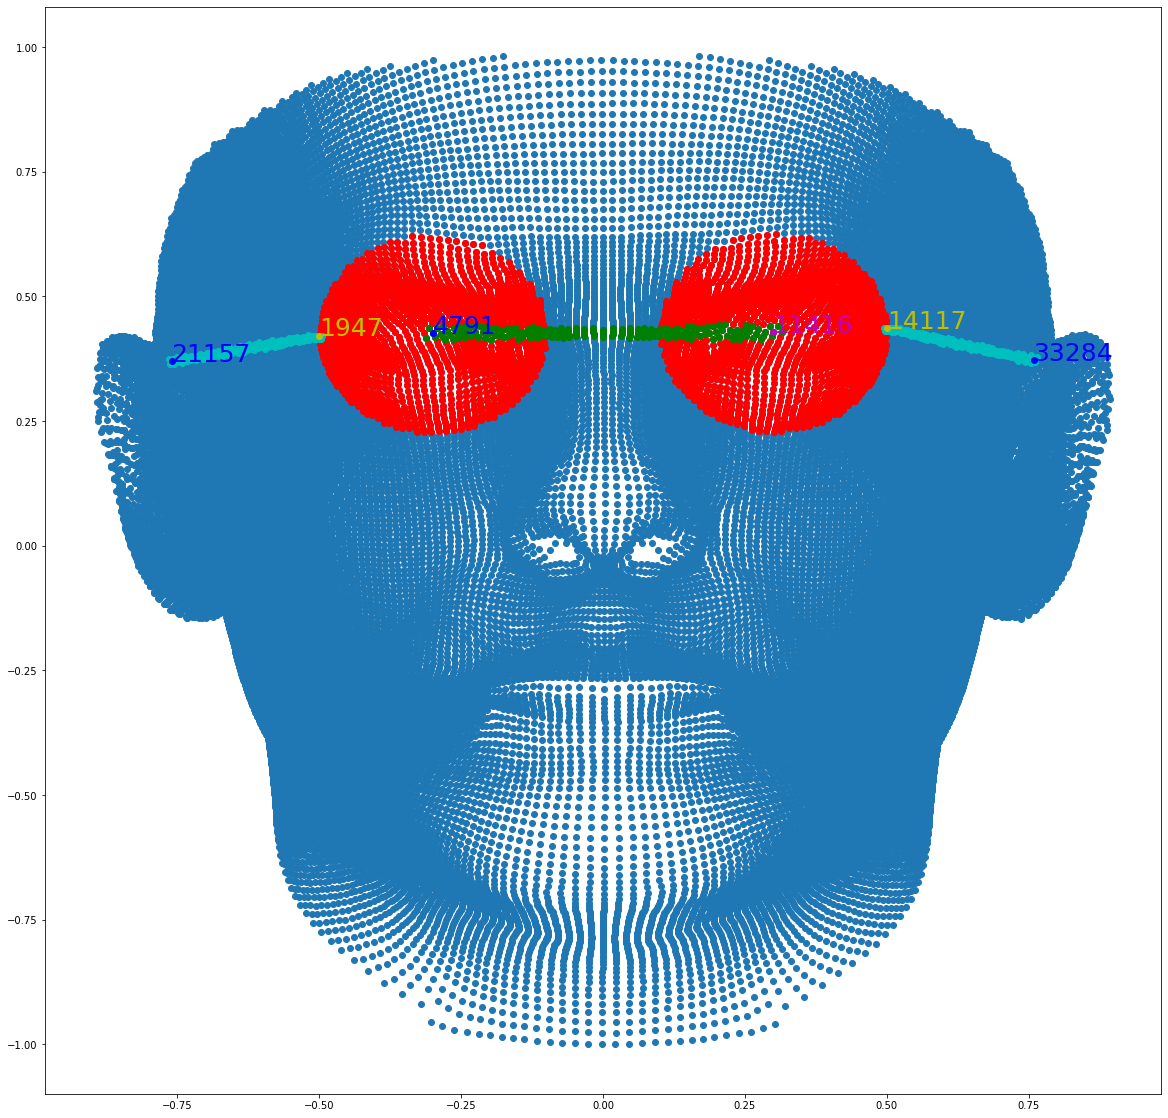

In [4]:
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(x,y)
ax.scatter(x[right_lens_inds],y[right_lens_inds],color='r')
ax.scatter(x[left_lens_inds],y[left_lens_inds],color='r')
ax.scatter(x[left_string],y[left_string],color='c')
ax.scatter(x[center_string],y[center_string],color='g')
ax.scatter(x[right_string],y[right_string],color='c')
inds = [config[CORONA_MASK_NAME].inds.left_upper_string2, 
        config[CORONA_MASK_NAME].inds.right_upper_string2,
        right_eye_ind]

for txt in inds:
    ax.annotate(txt, (x[txt], y[txt]),color='b', fontsize=25)
    ax.scatter(x[txt], y[txt],color='b')
inds = [right_ind_right_eye, left_ind_left_eye]
for txt in inds:
    ax.annotate(txt, (x[txt], y[txt]),color='y', fontsize=25)
    ax.scatter(x[txt], y[txt],color='y')
inds = [left_eye_ind]
for txt in inds:
    ax.annotate(txt, (x[txt], y[txt]),color='m', fontsize=25)
    ax.scatter(x[txt], y[txt],color='m')
    
print('Blue dots- 3DMM face model.')
print('Cyan dots - the sides of the sunglasses.')
print('Green dots - center string.')
print('Red dots - lenses.\n')